In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import regression tools
import sys
sys.path.append(r'../')
import RegressionTools as reg

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 
              'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 
              'sqft_lot':int, 'view':int}

In [3]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature.apply(lambda x: x ** power)
    return poly_dataframe

In [4]:
sales = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)
sales = sales.sort_values(by = ['sqft_living','price']) # sort the sales by square footage, break tie by price

### Estimate Nth degree polynomial on all data

In [5]:
def get_poly_data_and_weights(data, input_feature, output_feature, degree):
    poly_data = polynomial_dataframe(data[input_feature], degree)
    poly_data['constant'] = np.ones(poly_data['power_1'].shape)
    poly_features = poly_data.columns
    poly_data['price'] = data[output_feature]
    poly_weights = reg.multiple_linear_regression(poly_data, poly_features, 'price')
    return poly_data, poly_features, poly_weights

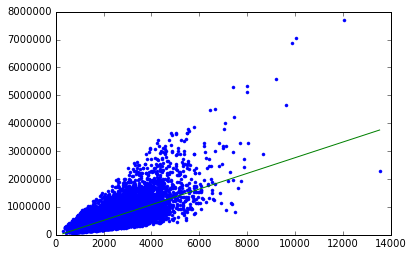

In [6]:
poly1_data, poly1_features, poly1_weights = get_poly_data_and_weights(sales, 'sqft_living','price', 1)
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', 
         poly1_data['power_1'], reg.get_multiple_regression_predictions(poly1_data, poly1_features, poly1_weights))

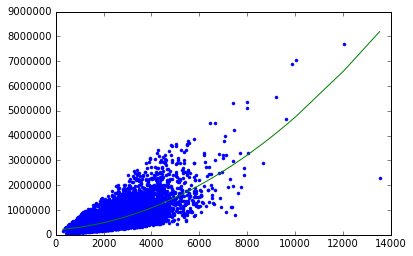

In [7]:
# try a 2nd degree polynomial
poly2_data, poly2_features, poly2_weights = get_poly_data_and_weights(sales, 'sqft_living','price', 2)
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', 
         poly1_data['power_1'], reg.get_multiple_regression_predictions(poly2_data, poly2_features, poly2_weights))

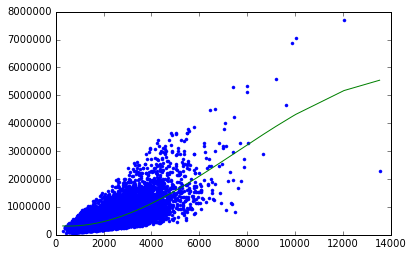

In [8]:
# try a 3rd degree polynomial
poly3_data, poly3_features, poly3_weights = get_poly_data_and_weights(sales, 'sqft_living','price', 3)
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', 
         poly1_data['power_1'], reg.get_multiple_regression_predictions(poly3_data, poly3_features, poly3_weights))

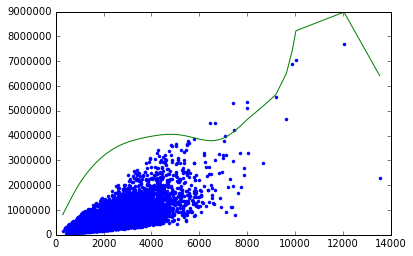

In [9]:
# try a 15th degree polynomial
poly15_data, poly15_features, poly15_weights = get_poly_data_and_weights(sales, 'sqft_living','price', 15)
plt.plot(poly1_data['power_1'], poly1_data['price'], '.', 
         poly1_data['power_1'], reg.get_multiple_regression_predictions(poly15_data, poly15_features, poly15_weights))

### Estimate a 15th degree polynomial on 4 subsets

In [10]:
set1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype = dtype_dict)
set2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype = dtype_dict)
set3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype = dtype_dict)
set4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype = dtype_dict)
set1 = set1.sort_values(by = ['sqft_living','price'])  
set2 = set2.sort_values(by = ['sqft_living','price'])  
set3 = set3.sort_values(by = ['sqft_living','price'])  
set4 = set4.sort_values(by = ['sqft_living','price'])  

In [11]:
data1, features1, weights1  = get_poly_data_and_weights(set1, 'sqft_living','price', 15)
data2, features2, weights2  = get_poly_data_and_weights(set2, 'sqft_living','price', 15)
data3, features3, weights3  = get_poly_data_and_weights(set3, 'sqft_living','price', 15)
data4, features4, weights4  = get_poly_data_and_weights(set4, 'sqft_living','price', 15)

In [12]:
weights = weights1
weights = np.vstack((weights, weights2))
weights = np.vstack((weights, weights3))
weights = np.vstack((weights, weights4))
pd.DataFrame(weights.T, features1)

,0,1,2,3
power_1,1.013437e+04,1.740138e+04,4.164658e+03,1.584400e+04
power_2,-1.848231e+01,-2.966250e+01,-1.234151e+01,-3.210532e+01
power_3,1.764692e-02,3.735164e-02,1.865432e-02,4.315608e-02
power_4,-9.749060e-06,-2.996957e-05,-1.668526e-05,-3.844055e-05
power_5,3.137804e-09,1.515800e-08,9.483573e-09,2.235536e-08
power_6,-5.191565e-13,-4.806164e-12,-3.495369e-12,-8.550807e-12
power_7,1.233516e-17,8.945473e-16,8.182910e-16,2.127957e-15
power_8,9.888291e-21,-7.014227e-20,-1.104860e-19,-3.202706e-19
power_9,-1.211406e-24,-5.932954e-24,5.241087e-24,1.955756e-23
power_10,-5.621857e-29,1.655886e-27,6.605162e-28,2.468217e-27


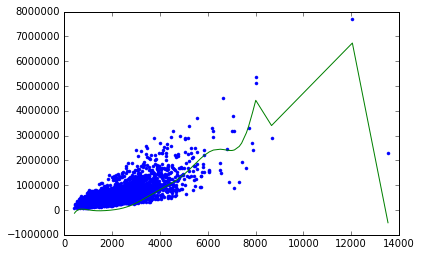

In [13]:
plt.plot(data1['power_1'], data1['price'], '.', 
         data1['power_1'], reg.get_multiple_regression_predictions(data1, features1, weights1))

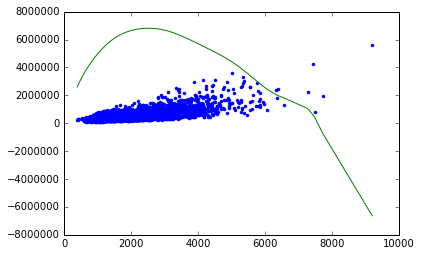

In [14]:
plt.plot(data2['power_1'], data2['price'], '.', 
         data2['power_1'], reg.get_multiple_regression_predictions(data2, features2, weights2))

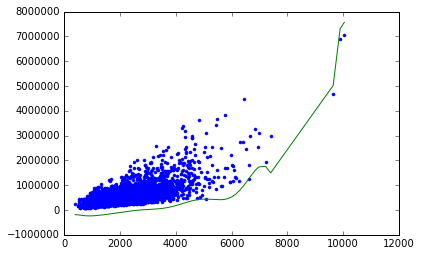

In [15]:
plt.plot(data3['power_1'], data3['price'], '.', 
         data3['power_1'], reg.get_multiple_regression_predictions(data3, features3, weights3))

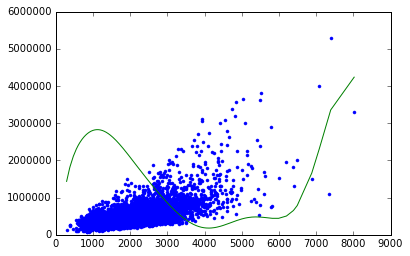

In [16]:
plt.plot(data4['power_1'], data4['price'], '.', 
         data4['power_1'], reg.get_multiple_regression_predictions(data4, features4, weights4))

### Use cross validation to select the best degree

In [17]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype = dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype = dtype_dict)
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype = dtype_dict)
train_data = train_data.sort_values(by = ['sqft_living','price'])  
test_data = test_data.sort_values(by = ['sqft_living','price'])  
valid_data = valid_data.sort_values(by = ['sqft_living','price'])  

In [29]:
min_rss = 1e99
for degree in range(1, 15+1):
    pdata, pfeatures, pweights  = get_poly_data_and_weights(train_data, 'sqft_living','price', degree)
    valid_poly_data, vpfeatures, vpweights = get_poly_data_and_weights(valid_data, 'sqft_living','price', degree)
    rss = reg.get_residual_sum_of_squares_multiple_models(valid_poly_data, pfeatures, 'price', pweights)
    if rss < min_rss:
        min_rss = rss
        min_index = degree
print('%dth degree has the lowest RSS of %E on Validation Data' % (min_index, min_rss))

5th degree has the lowest RSS of 6.200456E+14 on Validation Data


In [30]:
pdata, pfeatures, pweights  = get_poly_data_and_weights(train_data, 'sqft_living','price', min_index)
test_poly_data, tpfeatures, tpweights = get_poly_data_and_weights(test_data, 'sqft_living','price', min_index)
rss = reg.get_residual_sum_of_squares_multiple_models(test_poly_data, pfeatures, 'price', pweights)
print('5th degree has the lowest RSS of %E on Test Data' % (rss))

5th degree has the lowest RSS of 1.355672E+14 on Test Data
